<a href="https://colab.research.google.com/github/Rizqiemn/covid19-predict/blob/master/covid19_predict_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tensor.__version__)

2.2.0


In [ ]:
pip install split_folders

In [ ]:
import zipfile,os,split_folders
# split_folders berfungsi untuk membagi otomatis file.
local_zip = '/tmp/sarscov19.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/sarscov19')
zip_ref.close()


In [ ]:

base_dir = '/tmp/sarscov19'
split_folders.ratio(base_dir,
                    output="/tmp/sarscov19", 
                    seed=2188,
                    ratio=(.6 , .4))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')





Copying files: 0 files [00:00, ? files/s]



Copying files: 331 files [00:00, 3307.27 files/s]



Copying files: 708 files [00:00, 3432.27 files/s]



Copying files: 1117 files [00:00, 3606.10 files/s]



Copying files: 1368 files [00:00, 2889.87 files/s]



Copying files: 1603 files [00:00, 2558.14 files/s]



Copying files: 1883 files [00:00, 2624.53 files/s]



Copying files: 2125 files [00:00, 2550.19 files/s]



Copying files: 2481 files [00:00, 2769.30 files/s]


In [ ]:
# membuat direktori latih untuk batu
latih_covid_dir = os.path.join(train_dir, 'COVID')
# membuat direktori latih untuk kertas
latih_noncovid_dir = os.path.join(train_dir, 'non-COVID')

# membuat direktori latih untuk batu
val_covid_dir = os.path.join(validation_dir, 'COVID')
# membuat direktori latih untuk kertas
val_noncovid_dir = os.path.join(validation_dir, 'non-COVID')

In [ ]:
LatihDataGen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
TesDataGen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = LatihDataGen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = TesDataGen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 1488 images belonging to 2 classes.
Found 993 images belonging to 2 classes.


In [ ]:
model = tensor.keras.models.Sequential([
    tensor.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tensor.keras.layers.MaxPooling2D(2, 2),
    tensor.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tensor.keras.layers.MaxPooling2D(2,2),
    tensor.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tensor.keras.layers.MaxPooling2D(2,2),
    tensor.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tensor.keras.layers.MaxPooling2D(2,2),
    tensor.keras.layers.Flatten(),
    tensor.keras.layers.Dense(512, activation='relu'),
    tensor.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.7119 - accuracy: 0.5900 - val_loss: 0.6875 - val_accuracy: 0.6000
Epoch 2/20
25/25 - 6s - loss: 0.7068 - accuracy: 0.5300 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6947 - accuracy: 0.4600 - val_loss: 0.6934 - val_accuracy: 0.4500
Epoch 4/20
25/25 - 6s - loss: 0.6941 - accuracy: 0.5500 - val_loss: 0.6907 - val_accuracy: 0.5500
Epoch 5/20
25/25 - 6s - loss: 0.6917 - accuracy: 0.6000 - val_loss: 0.6783 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 6s - loss: 0.6950 - accuracy: 0.4900 - val_loss: 0.6975 - val_accuracy: 0.3500
Epoch 7/20
25/25 - 6s - loss: 0.6895 - accuracy: 0.5700 - val_loss: 0.7020 - val_accuracy: 0.4000
Epoch 8/20
25/25 - 6s - loss: 0.6850 - accuracy: 0.5600 - val_loss: 0.6995 - val_accuracy: 0.4500
Epoch 9/20
25/25 - 6s - loss: 0.6805 - accuracy: 0.5700 - val_loss: 0.6750 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.6564 - accuracy: 0.5900 - val_loss: 0.9973 - val_accuracy: 0.2500
Epoch 11/20
25/25 -

Saving Covid (1).png to Covid (1) (2).png
Covid (1).png
[[7.0744967e-13]]
Covid


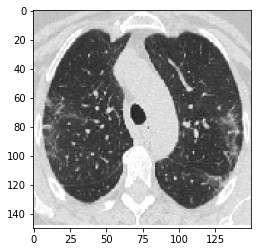

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if classes==0:
   print('non-Covid')
  else:
   print('Covid')